# Sucrose-Inversion Kinetics (CEU) Lab for CBE 154
Presented by Group MW1: Rahil Shaik, Sneha Kancharla, Alex Quemuel, Ethan Mibu

### Glucose Standard Results

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df_stand = pd.read_csv("glucose-standard-res.csv")
df_stand

,Concentration of Reagent (g/L),Absorbance
0,0.02,0.52182
1,0.04,0.85720
2,0.06,1.03990
3,0.08,1.24860


##### our cuvette has a path length of 1 cm, so let's convert our concentration to units of cm^3

In [92]:
df_stand["Concentration (g/cm^3)"] = df_stand["Concentration of Reagent (g/L)"] * (1/1000)
df_stand

,Concentration of Reagent (g/L),Absorbance,Concentration (g/cm^3)
0,0.02,0.52182,0.00002
1,0.04,0.85720,0.00004
2,0.06,1.03990,0.00006
3,0.08,1.24860,0.00008


##### Now adjusting the absoprtion with the DI water baseline
##### $$ A_{\text{glucose,adj}} = A_{\text{glucose}} - A_{\text{DIW}}$$

In [93]:
A_DI1 = 0.1256 # DI Water Baseline Absorbance Day 1
A_DI2 = 0.13629 # DI Water Baseline Absorbance Day 2

df_stand["Absorbance adjusted"] = df_stand["Absorbance"].apply(lambda x: x - A_DI1)
df_stand

,Concentration of Reagent (g/L),Absorbance,Concentration (g/cm^3),Absorbance adjusted
0,0.02,0.52182,0.00002,0.39622
1,0.04,0.85720,0.00004,0.73160
2,0.06,1.03990,0.00006,0.91430
3,0.08,1.24860,0.00008,1.12300


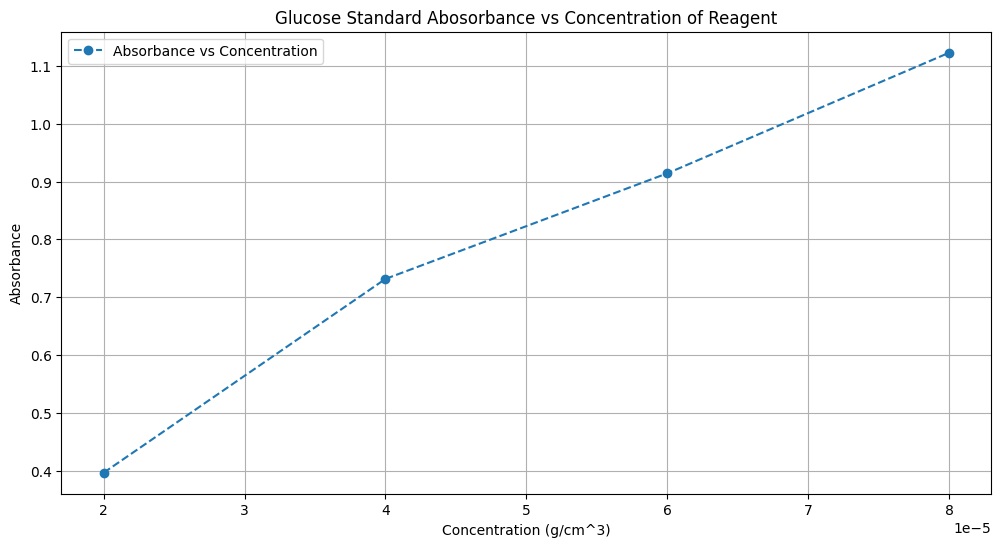

In [94]:
plt.figure(figsize=(12,6))
plt.plot(df_stand["Concentration (g/cm^3)"], df_stand["Absorbance adjusted"], label = "Absorbance vs Concentration",  marker= "o", linestyle="--")
plt.xlabel("Concentration (g/cm^3)")
plt.ylabel("Absorbance")
plt.title("Glucose Standard Abosorbance vs Concentration of Reagent")
plt.grid()
plt.legend()

plt.show()

### CEU Glucose Product Results

Note that all temperature recordings are in Celisus

In [95]:
df_res = pd.read_csv("CEU-glucose-results.csv")
df_res.query("Temperature == 50")

,Day,Type,Temperature,Absorbance
0,1,1,50,1.5791
3,2,2,50,1.6128
4,2,2,50,1.6304
5,2,2,50,1.6542


In [96]:
def adjust_absorbance(day, absorbance, A_DI1, A_DI2):
    if day == 1:
        return absorbance - A_DI1
    elif day == 2:
        return absorbance - A_DI2
    else:
        raise ValueError("Invalid day value")
    
df_res["Absorbance adjusted"] = df_res.apply(lambda x: adjust_absorbance(x["Day"], x["Absorbance"], A_DI1, A_DI2), axis=1)


In [97]:
df_grouped = df_res.groupby(["Day", "Type", "Temperature"])["Absorbance adjusted"].mean().reset_index()
df_grouped.rename(columns={"Absorbance adjusted": "Absorbance adjusted meaned"}, inplace=True)
df_grouped

,Day,Type,Temperature,Absorbance adjusted meaned
0,1,1,50,1.453500
1,1,1,60,1.614000
2,1,1,70,1.708000
3,2,2,50,1.496177
4,2,2,60,1.527677
5,2,2,70,1.564477


##### Now let's use Beer-Lambert law to determine glucose concentration from the absorbance, the first step is to find the absorptivity of the glucose reagent
##### $$A = \epsilon \cdot c \cdot l$$



In [98]:
df_stand["Molar absorptivity"] = df_stand["Absorbance adjusted"] / df_stand["Concentration (g/cm^3)"] 
avg_molar_absorptivity = df_stand["Molar absorptivity"].mean()
df_stand

,Concentration of Reagent (g/L),Absorbance,Concentration (g/cm^3),Absorbance adjusted,Molar absorptivity
0,0.02,0.52182,0.00002,0.39622,19811.000000
1,0.04,0.85720,0.00004,0.73160,18290.000000
2,0.06,1.03990,0.00006,0.91430,15238.333333
3,0.08,1.24860,0.00008,1.12300,14037.500000


##### Beer-lambert law with 1 cm path length given by cuvette

In [99]:
path_length = 1 # cm
df_grouped["Glucose concentration (mol/L)"] = df_grouped["Absorbance adjusted meaned"] / (avg_molar_absorptivity * path_length)

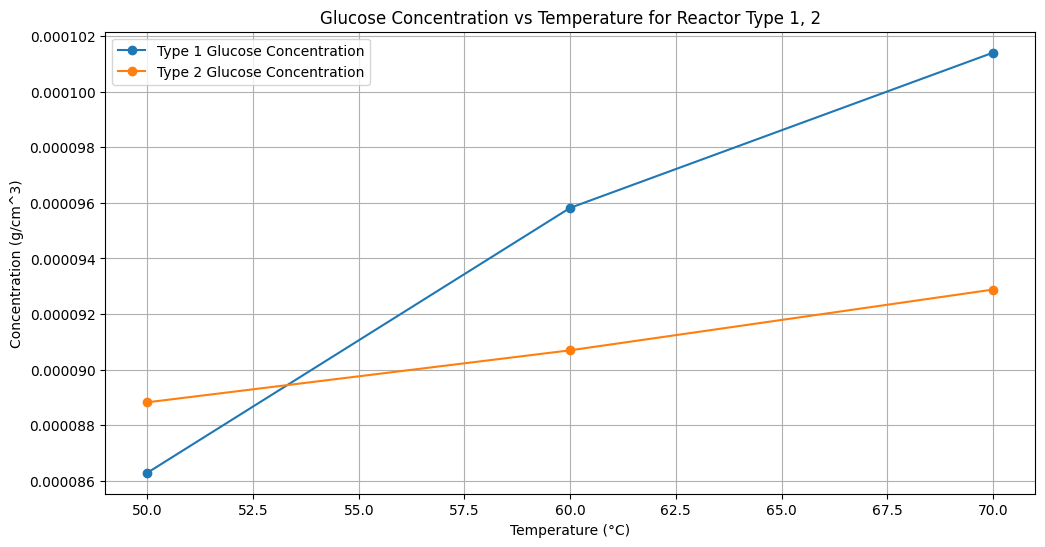

In [106]:
plt.figure(figsize=(12,6))
plt.plot(df_grouped.query("Type == 1")["Temperature"], df_grouped.query("Type == 1")["Glucose concentration (mol/L)"], label = "Type 1 Glucose Concentration", marker= "o")
plt.plot(df_grouped.query("Type == 2")["Temperature"], df_grouped.query("Type == 2")["Glucose concentration (mol/L)"], label = "Type 2 Glucose Concentration", marker= "o")
plt.xlabel("Temperature (°C)")
plt.ylabel("Concentration (g/cm^3)")
plt.title("Glucose Concentration vs Temperature for Reactor Type 1, 2")
plt.legend()
plt.grid()

plt.show()

##### Now using our surcose feed concentration, we can determine steady state conversion:
##### $$C_{\text{glucose}} = C_{\text{sucrose},0} \cdot X$$
##### $$X = \frac{C_{\text{glucose}}}{C_{\text{sucrose},i}}$$


In [107]:
C_sucrose_i = 7.6 * (1/1000) # g/cm^3
df_grouped["Conversion"] = df_grouped["Glucose concentration (mol/L)"] / C_sucrose_i

In [111]:
df_grouped

,Day,Type,Temperature,Absorbance adjusted meaned,Glucose concentration (mol/L),Conversion
0,1,1,50,1.453500,0.000086,0.011354
1,1,1,60,1.614000,0.000096,0.012608
2,1,1,70,1.708000,0.000101,0.013342
3,2,2,50,1.496177,0.000089,0.011687
4,2,2,60,1.527677,0.000091,0.011933
5,2,2,70,1.564477,0.000093,0.012221


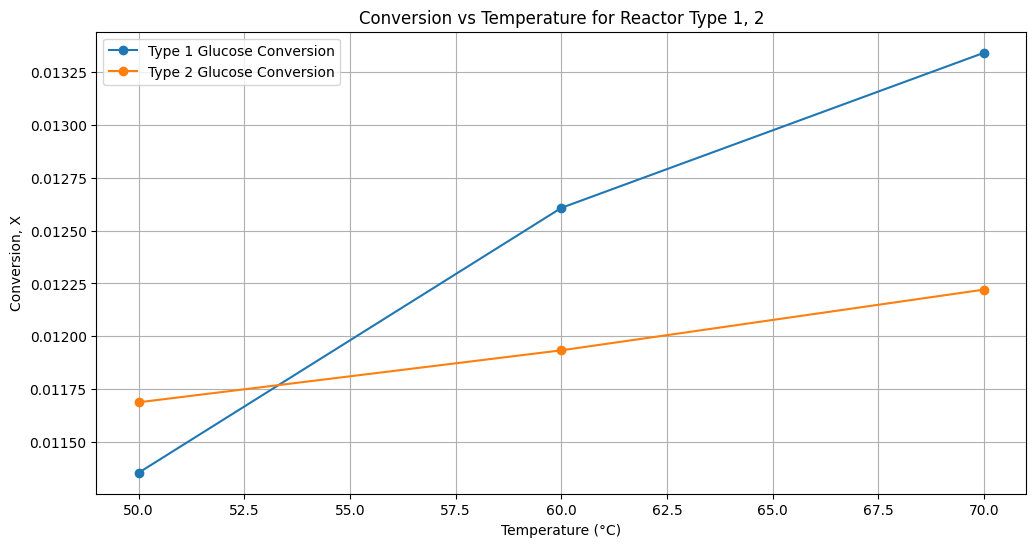

In [109]:
plt.figure(figsize=(12,6))
plt.plot(df_grouped.query("Type == 1")["Temperature"], df_grouped.query("Type == 1")["Conversion"], label = "Type 1 Glucose Conversion", marker= "o")
plt.plot(df_grouped.query("Type == 2")["Temperature"], df_grouped.query("Type == 2")["Conversion"], label = "Type 2 Glucose Conversion", marker= "o")
plt.xlabel("Temperature (°C)")
plt.ylabel("Conversion, X")
plt.title("Conversion vs Temperature for Reactor Type 1, 2")
plt.legend()
plt.grid()

plt.show()